# Creating ASN File for splittag Products

In [3]:
from costools import timefilter
import calcos 

from astropy.io import fits                                            
from astropy.table import Table

import numpy as np
import glob
import os


import matplotlib.pyplot as plt
from matplotlib import gridspec

### timefilter example from https://costools.readthedocs.io/en/latest/timefilter.html

In [19]:
!rm ./filtered_corrtag_*.fits
!rm filtered_asn.fits

data_dir = '../DayNight/'
output_dir = './output/'
plots_dir = output_dir + 'plots/'
!mkdir ./output
!mkdir ./output/plots/

filename_root = 'lb3q01meq'


timefilter.TimelineFilter(data_dir+filename_root+"_corrtag_a.fits", "filtered_corrtag_a.fits",  # your input names will be different
                              "sun_alt > 0.")
timefilter.TimelineFilter(data_dir+filename_root+"_corrtag_b.fits", "filtered_corrtag_b.fits",
                              "sun_alt > 0.")
# This must be repeated for all exposures

rm: filtered_asn.fits: No such file or directory


### Creating an ASN file out of the above files

In [9]:
# this properly assigns the type of exposure in a way that CalCOS will recognize
type_dict = {'WAVECAL' : 'EXP-AWAVE',
             'EXTERNAL/SCI' : 'EXP-FP'}

files = glob.glob(data_dir+filename_root+"_corrtag_a.fits") # This will be different depending on your output name ## only need the A segment in the ASN, and calcos will find B for you

for f in files:
    
    # Adding the file details to the association table
    rootnames = [f]  # MEMNAME
    types = [type_dict[fits.getval(f, 'EXPTYPE')]] # MEMTYPE
    included = [True] # MEMPRSNT
    
    # Adding the ASN details to the end of the association table
    # the rootname needs to be the full name, not just the rootname
    asn_root = os.path.basename(f.split('corrtag')[0][:-1]) # removing the extra "_" at the end of this
    rootnames.append(asn_root.upper()) # MEMNAME
    types.append('PROD-FP') # MEMTYPE
    included.append(True) # MEMPRSNT
    
    # Putting together the fits table
    #   40 is the number of characters allowed in this field. If your rootname is longer than 40, 
    #     you will need to increase this
    c1 = fits.Column(name='MEMNAME', array=np.array(rootnames), format='40A') 
    c2 = fits.Column(name='MEMTYPE', array=np.array(types), format='14A')
    c3 = fits.Column(name='MEMPRSNT', format='L', array=included)
    t = fits.BinTableHDU.from_columns([c1, c2, c3])
    
    # Writing the fits table
    t.writeto(asn_root.lower()+'_asn.fits')

    print('Saved: {}'.format(asn_root.lower()+'_asn.fits'))


Saved: lb3q01meq_asn.fits


In [10]:
# this properly assigns the type of exposure in a way that CalCOS will recognize
type_dict = {'WAVECAL' : 'EXP-AWAVE',
             'EXTERNAL/SCI' : 'EXP-FP'}

files = glob.glob('filtered_corrtag_a*') ## This will be different depending on your output name ## only need the A segment in the ASN, and calcos will find B for you

for f in files:
    
    # Adding the file details to the association table
    rootnames = [f]  # MEMNAME
    types = [type_dict[fits.getval(f, 'EXPTYPE')]] # MEMTYPE
    included = [True] # MEMPRSNT
    
    # Adding the ASN details to the end of the association table
    # the rootname needs to be the full name, not just the rootname
    asn_root = os.path.basename(f.split('corrtag')[0][:-1]) # removing the extra "_" at the end of this
    rootnames.append(asn_root.upper()) # MEMNAME
    types.append('PROD-FP') # MEMTYPE
    included.append(True) # MEMPRSNT
    
    # Putting together the fits table
    #   40 is the number of characters allowed in this field. If your rootname is longer than 40, 
    #     you will need to increase this
    c1 = fits.Column(name='MEMNAME', array=np.array(rootnames), format='40A') 
    c2 = fits.Column(name='MEMTYPE', array=np.array(types), format='14A')
    c3 = fits.Column(name='MEMPRSNT', format='L', array=included)
    t = fits.BinTableHDU.from_columns([c1, c2, c3])
    
    # Writing the fits table
    t.writeto(asn_root.lower()+'_asn.fits')

    print('Saved: {}'.format(asn_root.lower()+'_asn.fits'))


Saved: filtered_asn.fits


### Then run CalCOS on those individual files

In [13]:
#First run with the initial "FULL" data with all time-tag datapoints
calcos.calcos('./lb3q01meq_asn.fits', outdir="full_data_outs", verbosity = 0)

CALCOS version 3.3.9
numpy version 1.19.2
astropy version 4.0.2
Begin 13-Nov-2020 14:16:14 EST
Shifting to -30, 0
Shifting to -29, 0
Shifting to -28, 0
Shifting to -27, 0
Shifting to -26, 0
Shifting to -30, 0
Shifting to -29, 0
Shifting to -28, 0
Extraction algorithm = BOXCAR


    error estimate for y location = 8.68, FWHM = 4.02
Shifting to -34, 0
Shifting to -33, 0
Shifting to -32, 0
Shifting to -31, 0
Shifting to -30, 0
Shifting to -34, 0
Shifting to -33, 0
Shifting to -32, 0
Extraction algorithm = BOXCAR
    error estimate for y location = 4.24, FWHM = 4.12


0

In [14]:
#Now run with the "FILTERED" data with only time-tag datapoints allowed by the filter
calcos.calcos('./filtered_asn.fits', outdir="filtered_data_outs", verbosity= 0)

CALCOS version 3.3.9
numpy version 1.19.2
astropy version 4.0.2
Shifting to -30, 0
Shifting to -29, 0
Shifting to -28, 0
Shifting to -30, 0
Shifting to -29, 0
Shifting to -28, 0
Extraction algorithm = BOXCAR
    error estimate for y location = 8.22, FWHM = 3.94
Shifting to -34, 0
Shifting to -33, 0
Shifting to -32, 0
Shifting to -34, 0
Shifting to -33, 0
Shifting to -32, 0
Extraction algorithm = BOXCAR
    error estimate for y location = 4.33, FWHM = 4.20


0

In [16]:
ftab = Table.read("./full_data_outs/"+filename_root+"_x1dsum.fits")['WAVELENGTH','FLUX']
ttab = Table.read("./filtered_data_outs/filtered_x1dsum.fits")['WAVELENGTH','FLUX']

combo_dict_f = {'WAVELENGTH':[], 'FLUX':[]}
combo_dict_t = {'WAVELENGTH':[], 'FLUX':[]}

for row in ftab:
    for key in row.colnames:
        combo_dict_f[key]+=(list(row[key]))
        
for row in ttab:
    for key in row.colnames:
        combo_dict_t[key]+=(list(row[key]))

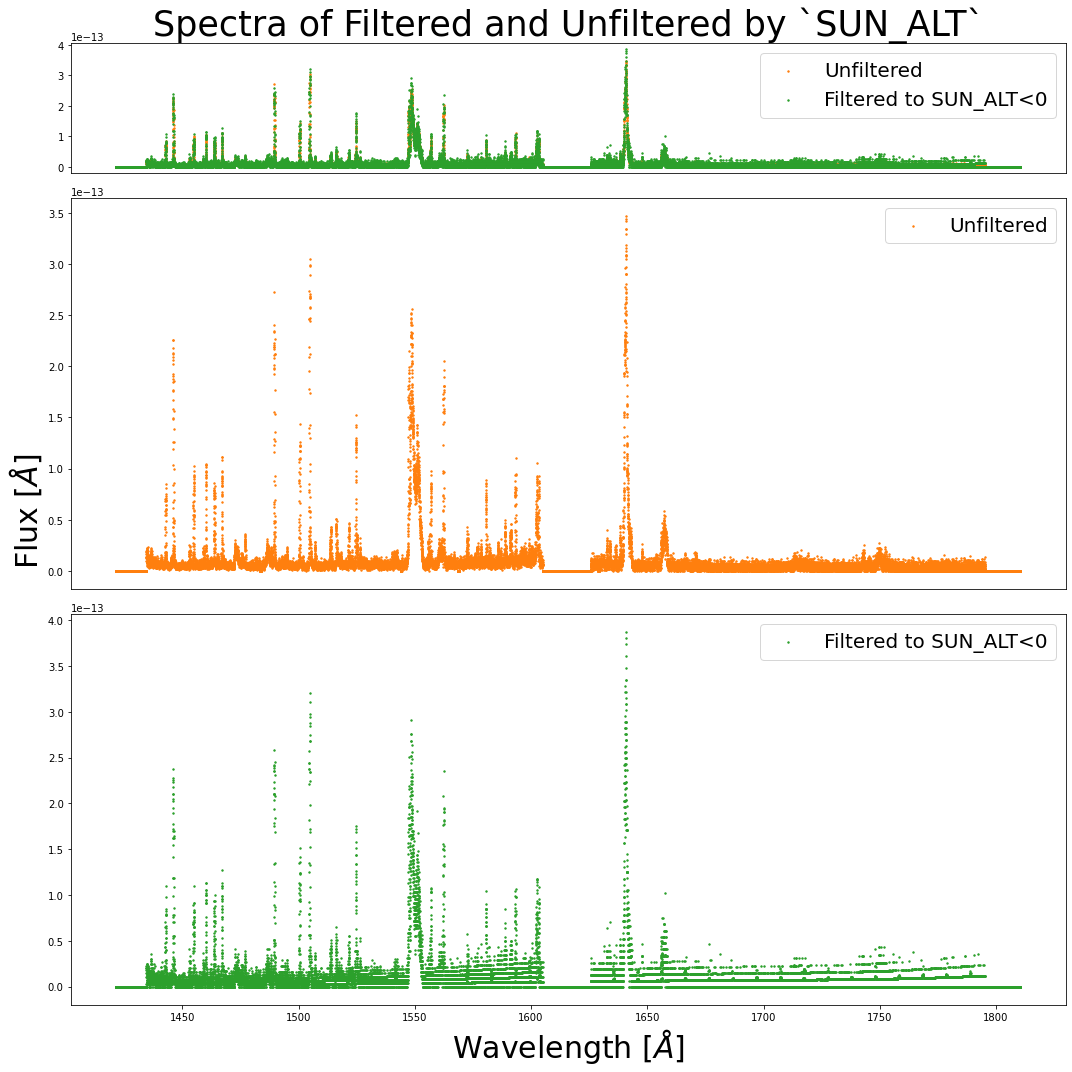

In [21]:
fig = plt.figure(figsize=(15, 15)) 
gs = gridspec.GridSpec(3,1, height_ratios=[1, 3,3]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[2])


ax0.scatter(combo_dict_f["WAVELENGTH"], combo_dict_f["FLUX"], s = 2, alpha = 1, c = 'C1',label = "Unfiltered")
ax0.scatter(combo_dict_t["WAVELENGTH"], combo_dict_t["FLUX"], s = 2, alpha = 1, c = 'C2', label = "Filtered to SUN_ALT<0")

ax1.scatter(combo_dict_f["WAVELENGTH"], combo_dict_f["FLUX"], s = 2, alpha = 1, c = 'C1',label = "Unfiltered")
ax0.set_xticks([])
ax2.scatter(combo_dict_t["WAVELENGTH"], combo_dict_t["FLUX"], s = 2, alpha = 1, c = 'C2', label = "Filtered to SUN_ALT<0")
ax1.set_xticks([])

ax0.legend(fontsize = 20)
ax1.legend(fontsize = 20)
ax2.legend(fontsize = 20)

ax2.set_xlabel("Wavelength [$\AA$]", fontsize = 30)
ax0.set_title("Spectra of Filtered and Unfiltered by `SUN_ALT`", size = 35)
ax1.set_ylabel("Flux [$\AA$]", fontsize = 30, y=0.2, horizontalalignment='center')
plt.tight_layout()

plt.savefig(plots_dir + 'compare_spectra_sunalt.png', dpi = 300)

In [27]:
tab

WAVELENGTH [16384],FLUX [16384]
Angstrom,erg / (Angstrom cm2 s)
float64,float32
1609.8236109987354 .. 1810.4490240614532,0.0 .. 0.0
1421.4640472574008 .. 1622.083306662505,0.0 .. 0.0


In [39]:
fits.info("../DayNight/lb3q01meq_corrtag_b.fits")
fits.info("./temp_corrtag_b.fits")

for extnum in [2]:
    print(Table.read("../DayNight/lb3q01meq_corrtag_b.fits", hdu = extnum),"\n=================================\n")

for extnum in [2,4]:
    print(Table.read("./temp_corrtag_b.fits", hdu = extnum))

Filename: ../DayNight/lb3q01meq_corrtag_b.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     178   ()      
  1  EVENTS        1 BinTableHDU    331   353972R x 12C   [1E, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1B]   
  2  GTI           1 BinTableHDU     22   1R x 2C   [1D, 1D]   
  3  TIMELINE      1 BinTableHDU    336   1334R x 12C   [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
Filename: ./temp_corrtag_b.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     179   ()      
  1  EVENTS        1 BinTableHDU    331   353972R x 12C   [1E, 1I, 1I, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1I, 1B]   
  2  GTI           1 BinTableHDU     22   1R x 2C   [1D, 1D]   
  3  TIMELINE      1 BinTableHDU    336   1334R x 12C   [1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E, 1E]   
  4  GTI           2 BinTableHDU     16   1R x 2C   [1D, 1D]   
 START         STOP       
seconds      seconds      
------- -----

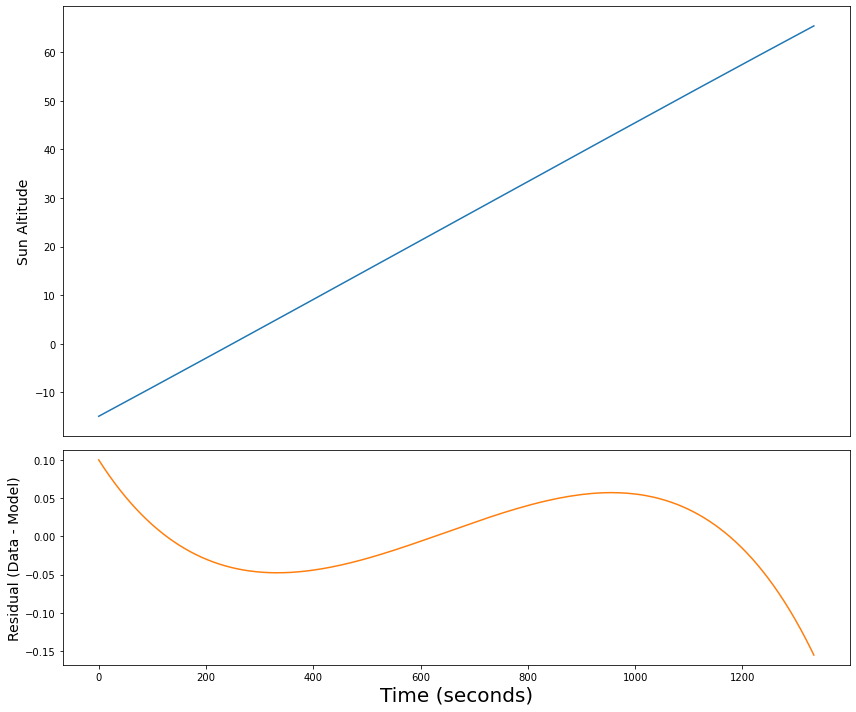

In [99]:
orig3= Table.read("../DayNight/lb3q01meq_corrtag_a.fits", hdu =3)
t,sa = orig3["TIME"],orig3["SUN_ALT"]
Y = np.polyval(np.polyfit(t,sa,1),t)
################
# plot it
fig = plt.figure(figsize=(12, 10)) 
gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
ax0 = plt.subplot(gs[0])
ax0.plot(t, sa)
ax0.set_xticks([])
ax0.set_ylabel("Sun Altitude", size = 14)

ax1 = plt.subplot(gs[1])
ax1.plot(t, sa - Y, "C1")
ax1.set_ylabel("Residual (Data - Model)", size = 14)
ax1.set_xlabel("Time (seconds)" , size = 20)

plt.tight_layout()

In [102]:
np.polyval(np.polyfit(t,sa,1),249.98399353027344)

-0.03880433445765519